In [12]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [13]:
data= pd.read_csv('NIKE.csv')

In [14]:
data.shape 

(7551, 7)

In [15]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-28,1.578125,1.625000,1.578125,1.617188,1.226407,18332800
1,1994-03-01,1.609375,1.613281,1.585938,1.613281,1.223444,12080000
2,1994-03-02,1.585938,1.621094,1.585938,1.609375,1.220482,11446400
3,1994-03-03,1.601563,1.601563,1.578125,1.585938,1.202709,11216000
4,1994-03-04,1.589844,1.621094,1.582031,1.621094,1.229369,12502400


In [16]:
data.index 

RangeIndex(start=0, stop=7551, step=1)

In [17]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [18]:
data=data.drop(columns=['Adj Close'],axis=1)

In [19]:
data['date']=pd.to_datetime(data['date'])

In [20]:
data.set_index('date', inplace=True)

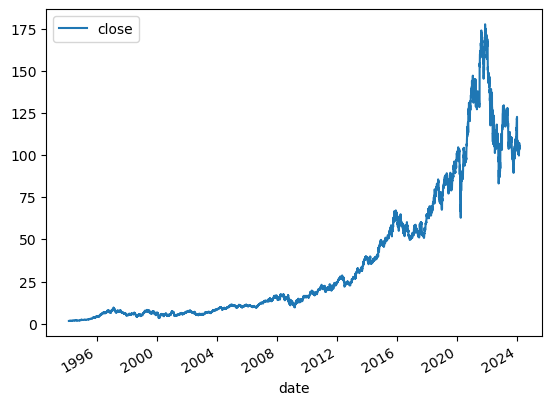

In [21]:
data.plot.line(y='close', use_index=True)
plt.savefig('NIKE.png');

In [22]:
data.describe()

,open,high,low,close,volume
count,7551.000000,7551.000000,7551.000000,7551.000000,7.551000e+03
mean,36.462841,36.839417,36.087262,36.468521,1.042187e+07
std,41.104602,41.512156,40.680243,41.093414,7.132525e+06
min,1.578125,1.601563,1.578125,1.585938,1.062400e+06
25%,6.843750,6.950000,6.752500,6.843750,6.330500e+06
50%,15.467500,15.670000,15.227500,15.480000,8.730400e+06
75%,55.950001,56.370001,55.490000,55.985001,1.238955e+07
max,176.350006,179.100006,175.500000,177.509995,1.574456e+08


In [23]:
data['Tomorrow']=data['close'].shift(-1)

In [24]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
1994-02-28,1.578125,1.625000,1.578125,1.617188,18332800,1.613281
1994-03-01,1.609375,1.613281,1.585938,1.613281,12080000,1.609375
1994-03-02,1.585938,1.621094,1.585938,1.609375,11446400,1.585938
1994-03-03,1.601563,1.601563,1.578125,1.585938,11216000,1.621094
1994-03-04,1.589844,1.621094,1.582031,1.621094,12502400,1.667969


In [25]:
data['previousday']=data['close'].shift(1)

In [26]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-28,1.578125,1.625000,1.578125,1.617188,18332800,1.613281,NaN
1994-03-01,1.609375,1.613281,1.585938,1.613281,12080000,1.609375,1.617188
1994-03-02,1.585938,1.621094,1.585938,1.609375,11446400,1.585938,1.613281
1994-03-03,1.601563,1.601563,1.578125,1.585938,11216000,1.621094,1.609375
1994-03-04,1.589844,1.621094,1.582031,1.621094,12502400,1.667969,1.585938


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

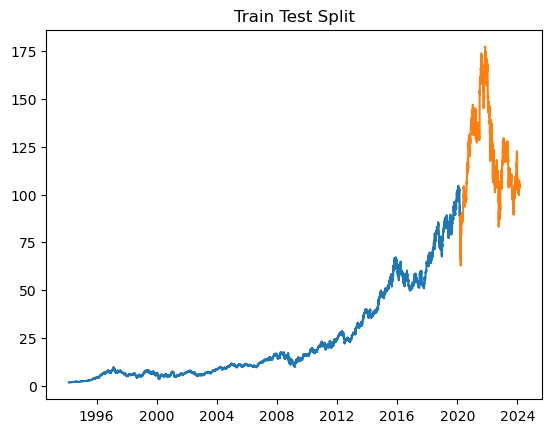

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 19.94
MAPE: 0.14
minae: 0.00
maxae: 73.11
medae: 14.88

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 20.03
MAPE: 0.14
minae: 0.00
maxae: 73.09
medae: 14.81

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 20.04
MAPE: 0.14
minae: 0.00
maxae: 73.19
medae: 14.94

Learning rate set to 0.358225
0:	learn: 16.0348574	total: 141ms	remaining: 14s
1:	learn: 10.6340733	total: 145ms	remaining: 7.09s
2:	learn: 7.1569646	total: 148ms	remaining: 4.8s
3:	learn: 4.9237674	total: 152ms	remaining: 3.64s
4:	learn: 3.4457712	total: 155ms	remaining: 2.94s
5:	learn: 2.5241290	total: 158ms	remaining: 2.48s
6:	learn: 1.9839016	total: 162ms	remaining: 2.15s
7:	learn: 1.5916662	total: 166ms	remaining: 1.91s
8:	learn: 1.4243771	total: 175ms	remaining: 1.77s
9:	learn: 1.2914804	total: 179ms	remaining: 1.61s
10:	learn: 1.2178510	total: 182ms	re

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-06,88.360001,88.158117
2020-03-09,84.110001,82.789260
2020-03-10,88.300003,85.445821
2020-03-11,84.000000,83.251697
2020-03-12,74.199997,75.006446
...,...,...
2024-02-20,103.300003,102.830515
2024-02-21,105.269997,103.721123
2024-02-22,105.080002,104.249136


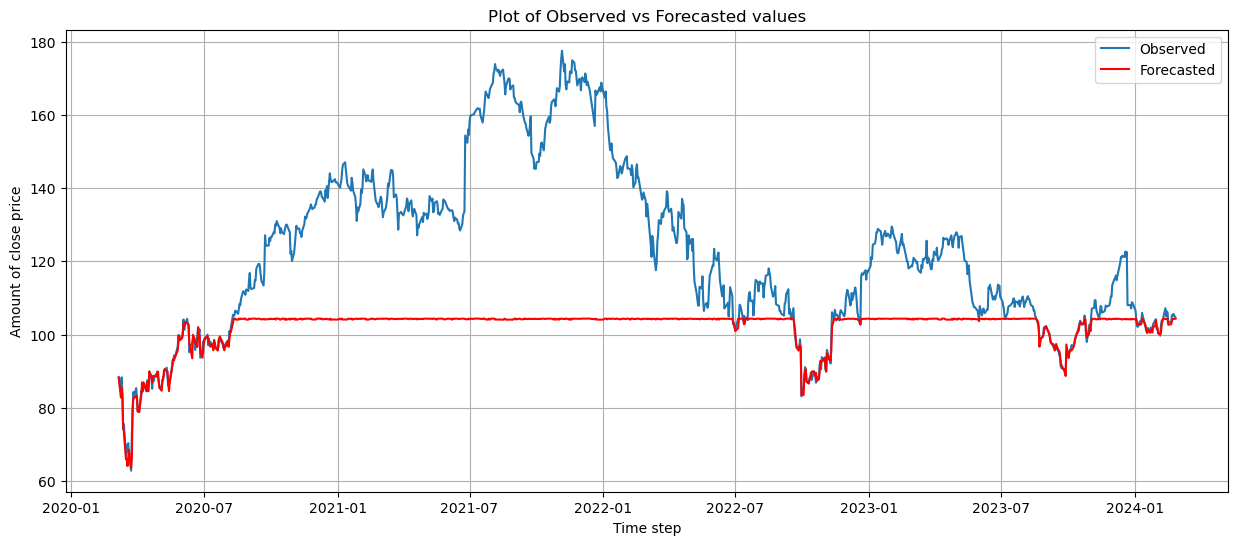

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-28,1.578125,1.625000,1.578125,1.617188,18332800,1.613281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,1.609375,1.613281,1.585938,1.613281,12080000,1.609375,1.617188,0.998791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,1.585938,1.621094,1.585938,1.609375,11446400,1.585938,1.613281,0.998788,3.230469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-03,1.601563,1.601563,1.578125,1.585938,11216000,1.621094,1.609375,0.992665,3.222656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-04,1.589844,1.621094,1.582031,1.621094,12502400,1.667969,1.585938,1.010962,3.195313,1.007282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(7551, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.617188,NaN
1994-03-01,0.998791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.613281,NaN
1994-03-02,0.998788,3.230469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.609375,NaN
1994-03-03,0.992665,3.222656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.585938,NaN
1994-03-04,1.010962,3.195313,1.007282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.621094,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(6551, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-12,1.003867,10.070313,1.002471,25.281251,0.937455,325.531264,0.746420,1702.500029,1.094851,4627.597783,5.070313,0.001543,5.046875,5.039063,4.628040,5.228817
1998-02-13,1.003837,10.101563,1.011132,25.289064,0.948032,324.515639,0.754092,1698.210967,1.102454,4631.050908,5.109375,0.001531,5.070313,5.062500,4.628520,5.222991
1998-02-17,1.041056,10.179688,1.075106,25.265626,1.031727,323.367201,0.820472,1693.882842,1.195838,4634.547002,5.546875,0.080670,5.242188,5.189453,4.629436,5.238790
1998-02-18,1.002809,10.656250,1.059033,25.796876,1.039957,322.578138,0.826883,1690.148467,1.201541,4638.484502,5.578125,0.113884,5.411458,5.326172,4.630381,5.255343
1998-02-19,1.005571,11.125000,1.046680,26.335938,1.053604,321.828138,0.837910,1686.492217,1.213952,4642.476689,5.640625,0.095599,5.588542,5.468750,4.631386,5.274137


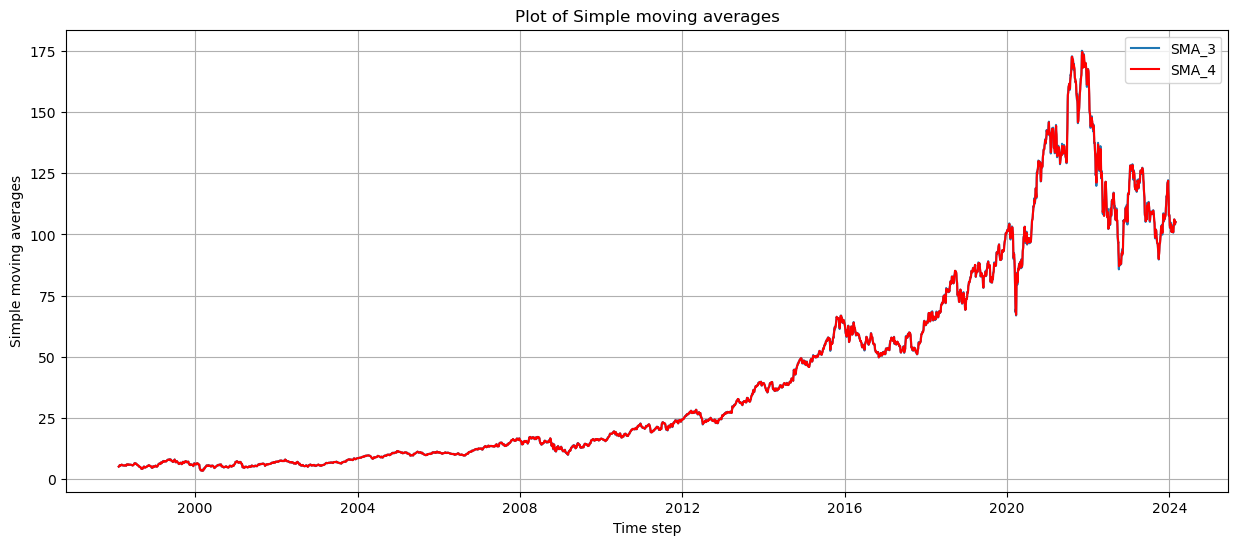

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

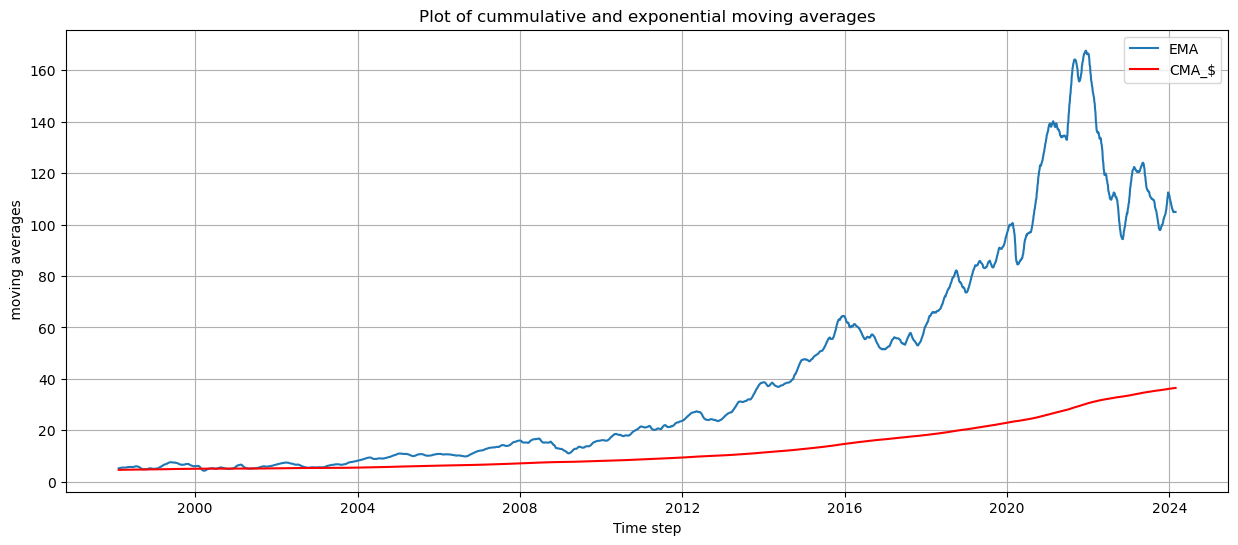

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

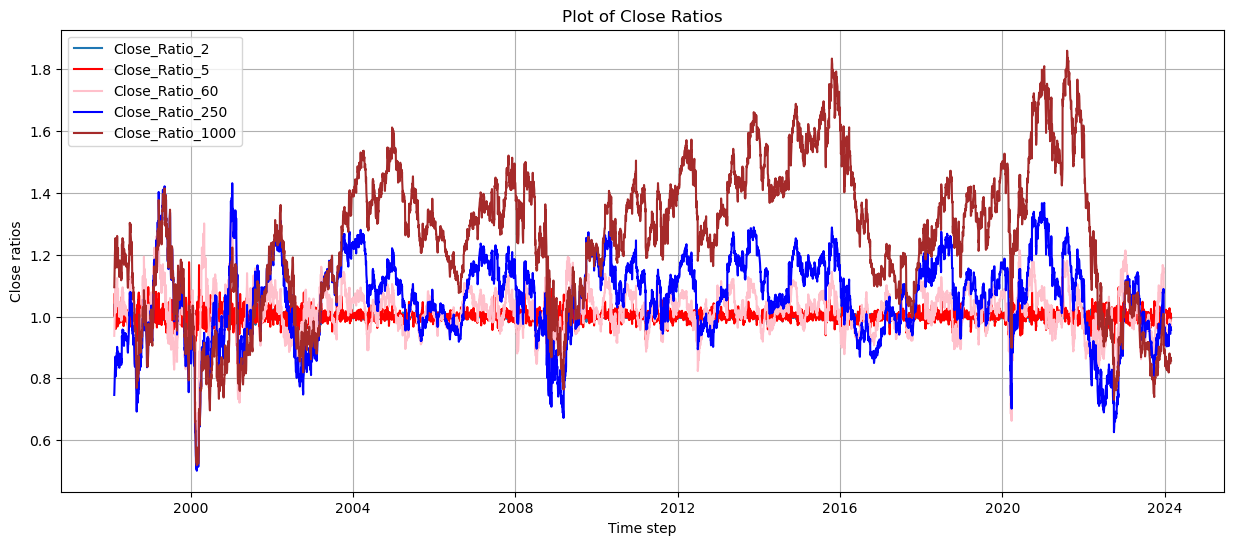

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

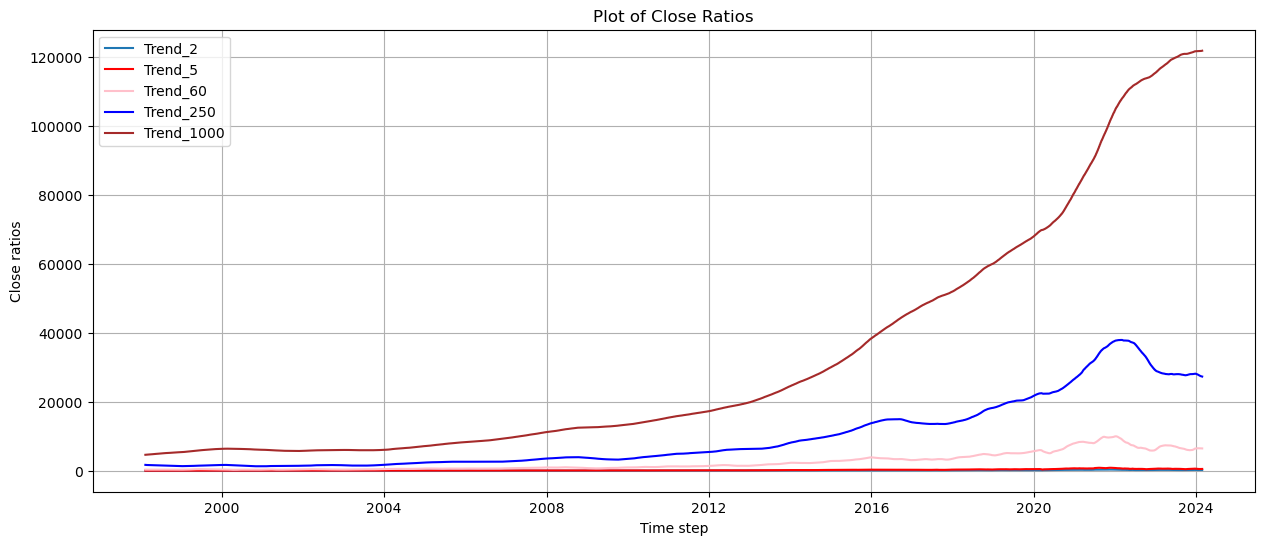

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

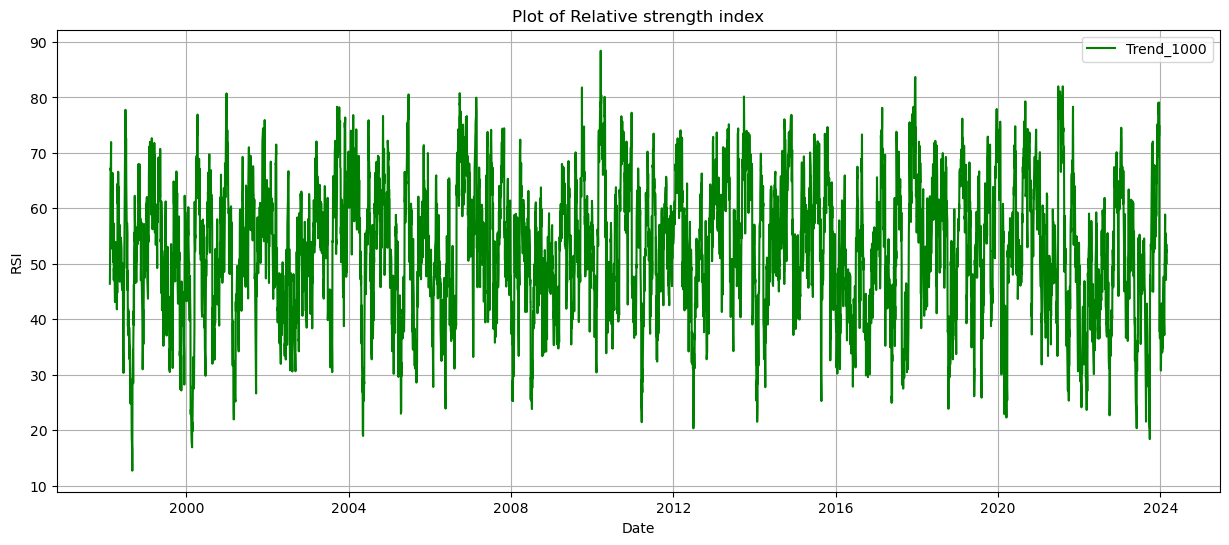

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

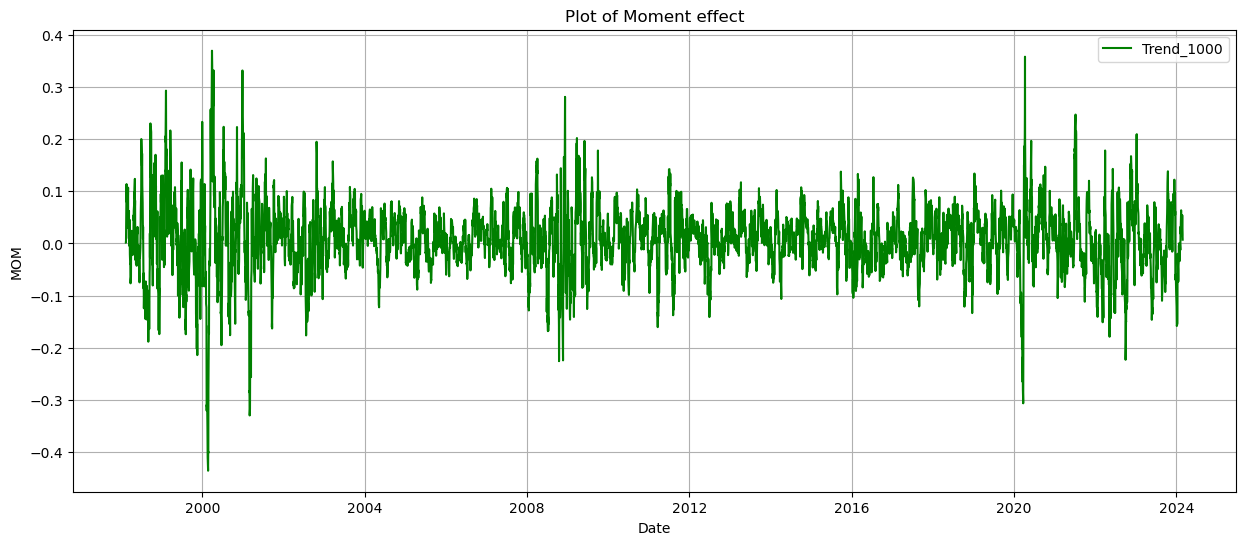

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [44]:
train.shape

(5551, 18)

In [45]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [46]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [47]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 20.94
MAPE: 0.15
minae: 0.01
maxae: 73.25
medae: 15.98

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 21.83
MAPE: 0.16
minae: 0.01
maxae: 73.43
medae: 17.38

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 21.61
MAPE: 0.15
minae: 0.00
maxae: 73.20
medae: 17.30

Learning rate set to 0.348972
0:	learn: 16.4778392	total: 4.42ms	remaining: 438ms
1:	learn: 11.0942580	total: 7.46ms	remaining: 365ms
2:	learn: 7.5122424	total: 11.4ms	remaining: 369ms
3:	learn: 5.0909489	total: 16.4ms	remaining: 394ms
4:	learn: 3.5202098	total: 19.6ms	remaining: 373ms
5:	learn: 2.5488742	total: 23.7ms	remaining: 371ms
6:	learn: 1.9185221	total: 28.2ms	remaining: 375ms
7:	learn: 1.5526659	total: 31.6ms	remaining: 364ms
8:	learn: 1.3328642	total: 37.2ms	remaining: 377ms
9:	learn: 1.2141700	total: 42.3ms	remaining: 380ms
10:	learn: 1.1319622	total: 46.3ms	remaining: 375ms
11:	learn: 1.

#### Improving the model

In [48]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [49]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [50]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [51]:
predictions_2 = backtest(new_data, model_2, predictors)

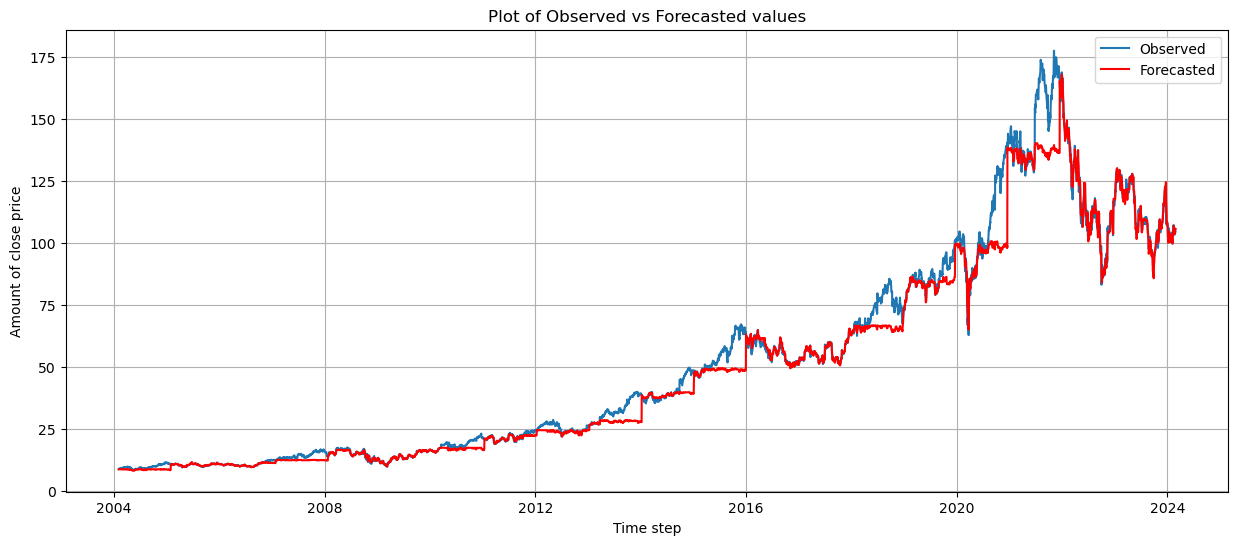

In [52]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [53]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [54]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [55]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.16141145681356497

mean absolute  error is : 22.465777111891484



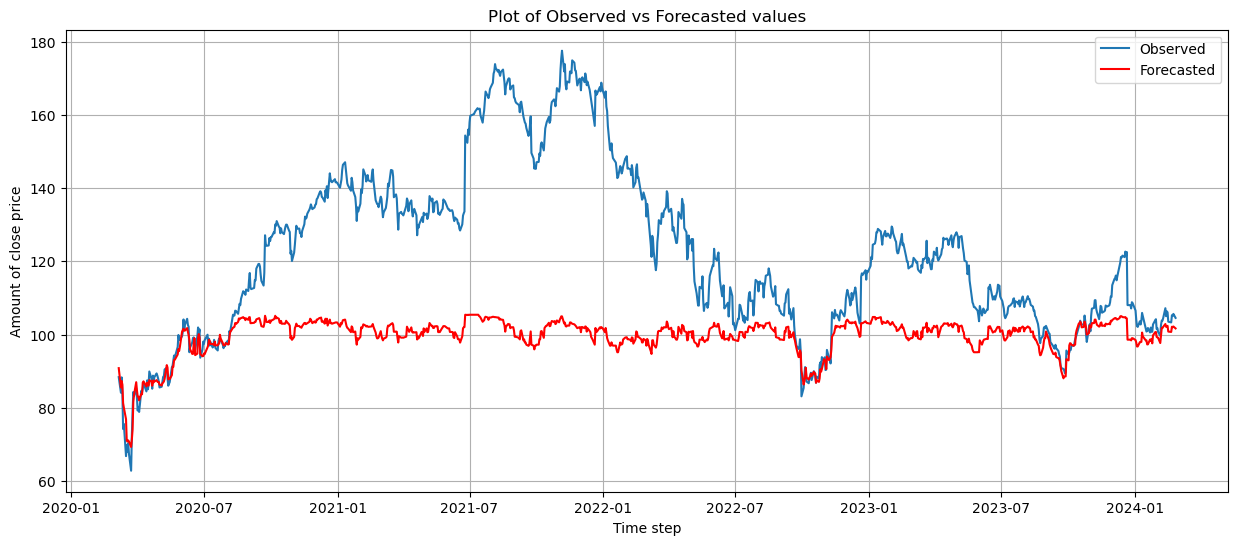

In [56]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [57]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [58]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [59]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 21.561457295960842 
 gradientboost minae: 0.01012518303127763 
 gradientboost maxae: 73.08996594316807 
 gradientboost medae: 17.029879513977093 
 gradientboost Mape: 0.15379060956594284 
  

 <-------------------------------------------------->



In [60]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-06,88.360001,89.960212
2020-03-09,84.110001,87.913023
2020-03-10,88.300003,87.510130
2020-03-11,84.000000,84.735704
2020-03-12,74.199997,80.890522
...,...,...
2024-02-20,103.300003,101.637485
2024-02-21,105.269997,102.230113
2024-02-22,105.080002,102.230113


In [61]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [62]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.15379060956594284

mean absolute  error is : 21.561457295960842



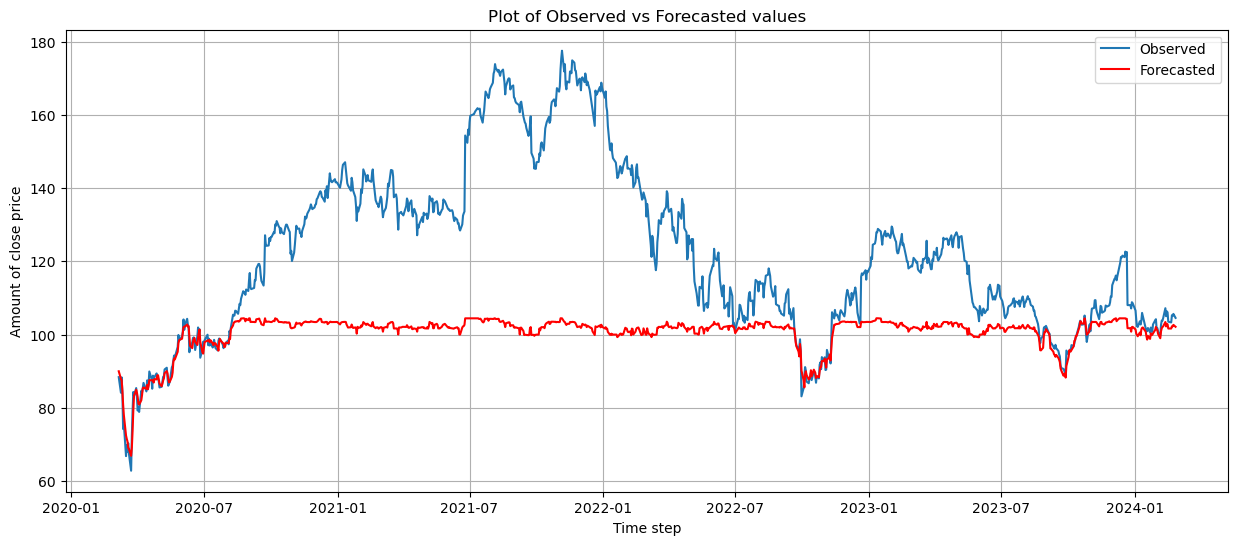

In [63]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [64]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 21.0637395745 
 bagging minae: 0.003996900000004189 
 bagging maxae: 73.07699540000002 
 bagging medae: 16.1680013 
 bagging Mape: 0.1498349105748111 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 1.0189705421851354 
 stacking minae: 0.0006844693820511338 
 stacking maxae: 7.314857872788991 
 stacking medae: 0.7706125110661475 
 stacking mape: 0.008638979477579092 



In [65]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [66]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [67]:
combined_bagg.head()

,close,0
date,,
2020-03-06,88.360001,90.239001
2020-03-09,84.110001,86.433000
2020-03-10,88.300003,86.292000
2020-03-11,84.000000,84.032000
2020-03-12,74.199997,81.440000


In [68]:
combined_stack

,close,0
date,,
2020-03-06,88.360001,91.229115
2020-03-09,84.110001,85.548347
2020-03-10,88.300003,88.011094
2020-03-11,84.000000,83.481374
2020-03-12,74.199997,80.875139
...,...,...
2024-02-20,103.300003,104.189546
2024-02-21,105.269997,104.136626
2024-02-22,105.080002,104.691375


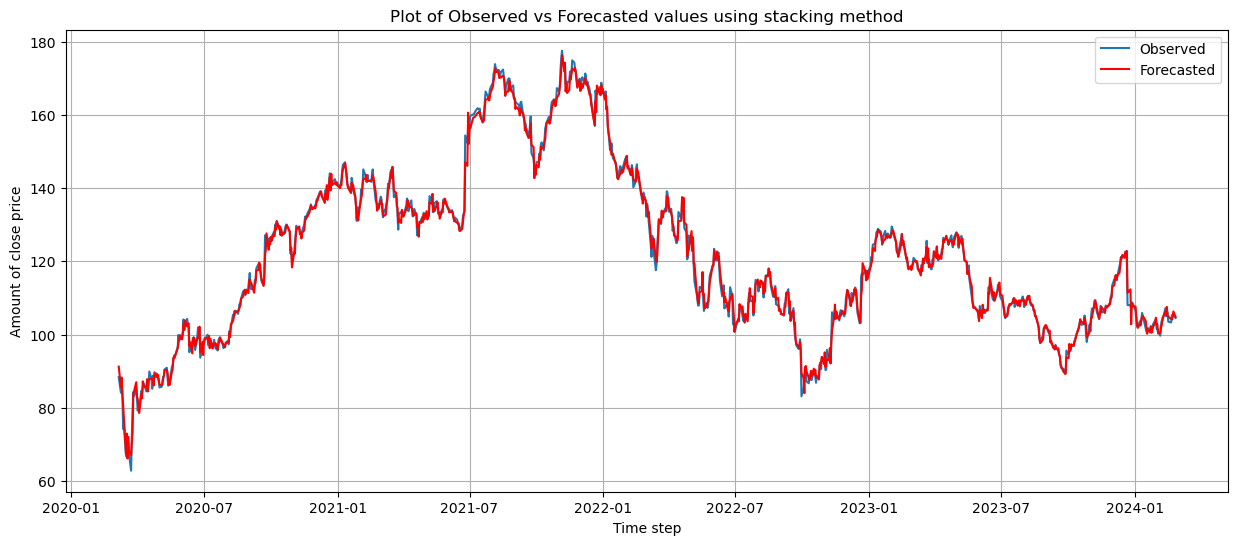

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

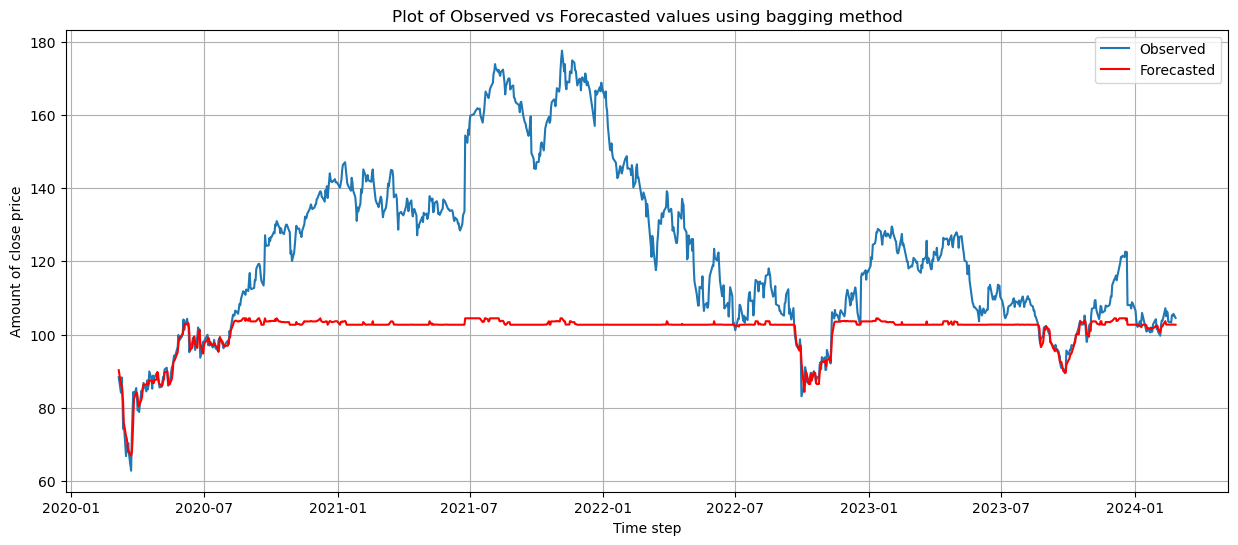

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

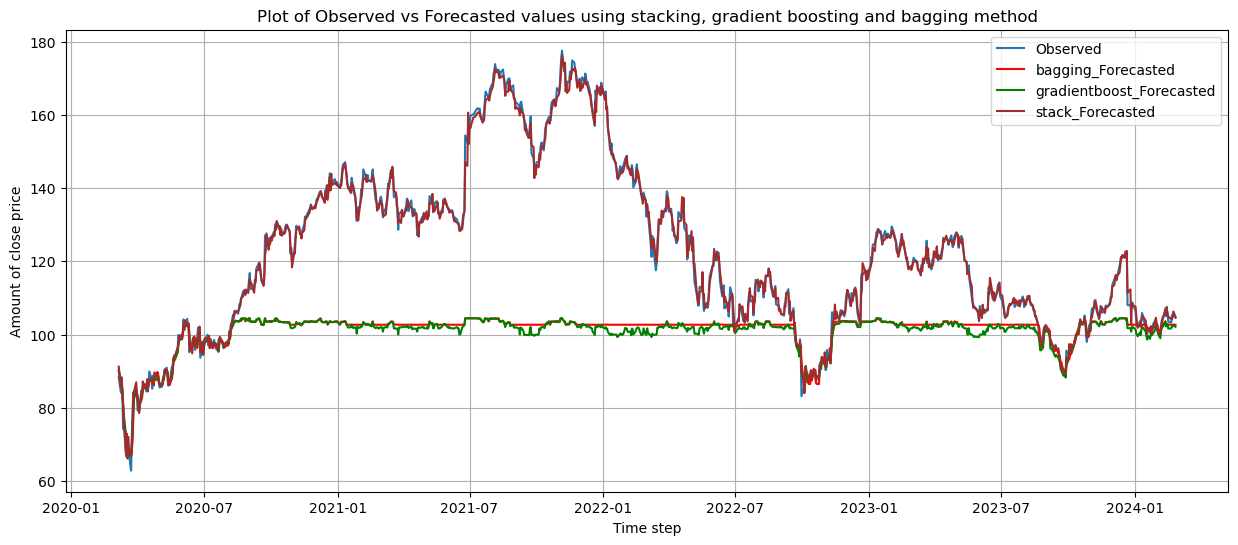

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Nikeresult.png')
plt.show()

In [72]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 20.94, 0.15, 0.01, 73.25, 15.98])
task1_result.add_row(['XGboost', 21.83, 0.16, 0.01, 73.43, 17.38])
task1_result.add_row(['GradientBoost', 21.61, 0.15, 0.00, 73.20, 17.30])
task1_result.add_row(['Catboost', 22.47, 0.16, 0.02, 72.55, 18.30])
task1_result.add_row(['Bagging', 21.06, 0.15, 0.00, 73.08, 16.17])
task1_result.add_row(['Stacking', 1.01, 0.01, 0.00, 7.14, 0.77])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    20.94    |     0.15     |      0.01     |     73.25     |     15.98     |
|    XGboost    |    21.83    |     0.16     |      0.01     |     73.43     |     17.38     |
| GradientBoost |    21.61    |     0.15     |      0.0      |      73.2     |      17.3     |
|    Catboost   |    22.47    |     0.16     |      0.02     |     72.55     |      18.3     |
|    Bagging    |    21.06    |     0.15     |      0.0      |     73.08     |     16.17     |
|    Stacking   |     1.01    |     0.01     |      0.0      |      7.14     |      0.77     |
+---------------+-------------+--------------+---------------+---------------+---------------+
